# **HEX SOFTWARES INTERNSHIP**
# <small>**Intern Name:** Komal Chauhan</small><br><small>**Domain:** Data Science</small><br><small>**Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn</small><br><small>**Platform:** Jupyter Notebook</small> 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel("titanic_eda.csv.xlsx")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,69.0,83.14,C
1,2,1,3,female,34.0,95.23,S
2,3,0,1,male,52.0,73.94,Q
3,4,0,1,male,10.0,63.27,S
4,5,0,2,male,19.0,44.73,S


# <small>Basic Data Info</small>

In [8]:
df.shape

(200, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  200 non-null    int64  
 1   Survived     200 non-null    int64  
 2   Pclass       200 non-null    int64  
 3   Sex          200 non-null    object 
 4   Age          185 non-null    float64
 5   Fare         200 non-null    float64
 6   Embarked     200 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,200.000000,200.000000,200.000000,185.000000,200.000000
mean,100.500000,0.500000,1.965000,37.102703,49.651500
std,57.879185,0.501255,0.835022,22.069437,27.355394
min,1.000000,0.000000,1.000000,1.000000,6.380000
25%,50.750000,0.000000,1.000000,18.000000,25.040000
50%,100.500000,0.500000,2.000000,36.000000,48.210000
75%,150.250000,1.000000,3.000000,57.000000,70.915000
max,200.000000,1.000000,3.000000,78.000000,99.970000


In [8]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            15
Fare            0
Embarked        0
dtype: int64

# <small>Handling Missing Values</small>

In [10]:
df['Age'].fillna(df['Age'].median())

0      69.0
1      34.0
2      52.0
3      10.0
4      19.0
       ... 
195    77.0
196    29.0
197    13.0
198    46.0
199    35.0
Name: Age, Length: 200, dtype: float64

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

# <small> Data Cleaning</small>

In [14]:
df.drop_duplicates(inplace=True)

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
dtype: object

In [17]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [18]:
df.rename(columns={
    "Pclass": "PassengerClass",
    "Sex": "Gender",
    "Fare": "TicketFare"
}, inplace=True)

In [19]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     200 non-null    int64  
 1   Survived        200 non-null    int64  
 2   PassengerClass  200 non-null    int64  
 3   Gender          200 non-null    int64  
 4   Age             185 non-null    float64
 5   TicketFare      200 non-null    float64
 6   Embarked        200 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 11.1 KB


# <small> Basic Statistical Analysis</small>

In [11]:
# Mean of Age and Fare
mean_values = df[['Age', 'Fare']].mean()
print("Mean Values:\n", mean_values)# Median of Age and Fare


Mean Values:
 Age     37.102703
Fare    49.651500
dtype: float64


In [12]:
# Median of Age and Fare
median_values = df[['Age', 'Fare']].median()
print("Median Values:\n", median_values)

Median Values:
 Age     36.00
Fare    48.21
dtype: float64


In [13]:
df['Survived'].value_counts()

Survived
0    100
1    100
Name: count, dtype: int64

In [14]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.438356
2    0.606557
3    0.469697
Name: Survived, dtype: float64

# <small> Data Visualization</small>

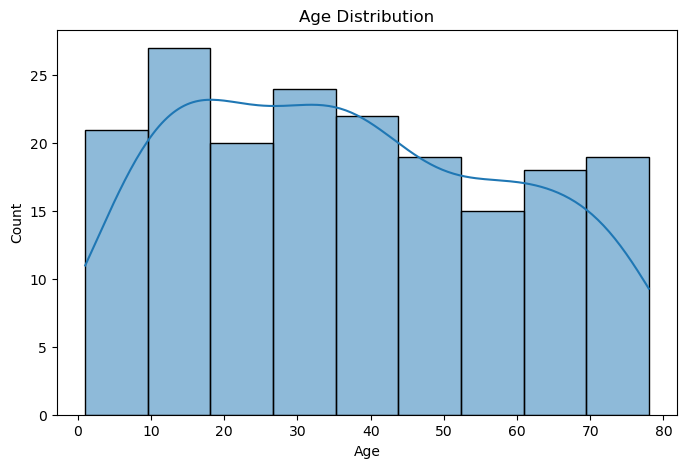

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

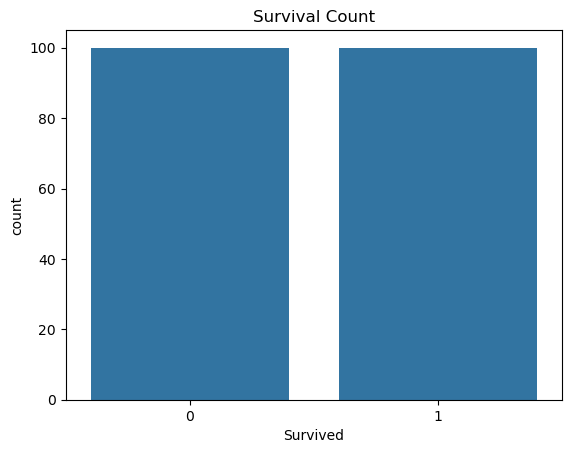

In [16]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

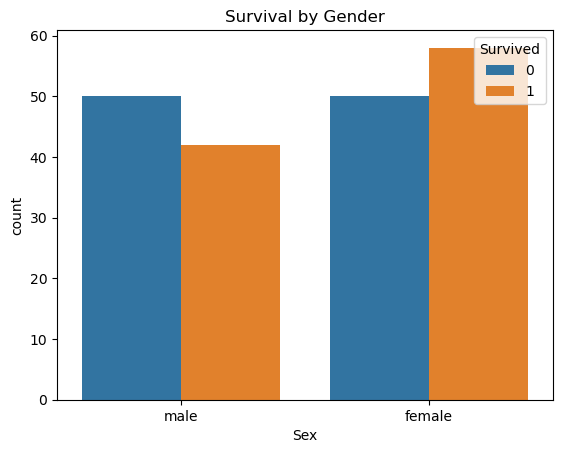

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

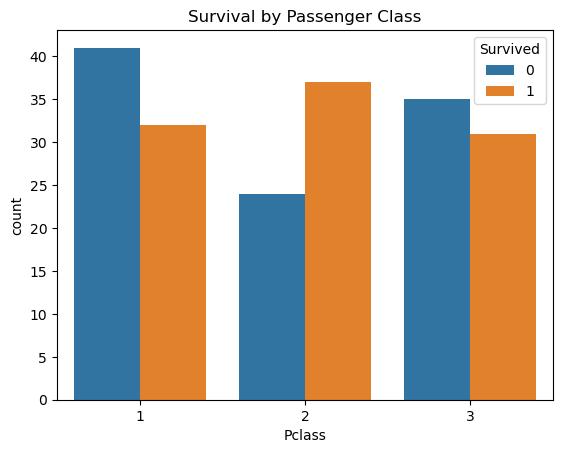

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

In [20]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.head()

,PassengerId,Survived,Pclass,Age,Fare
0,1,0,3,69.0,83.14
1,2,1,3,34.0,95.23
2,3,0,1,52.0,73.94
3,4,0,1,10.0,63.27
4,5,0,2,19.0,44.73


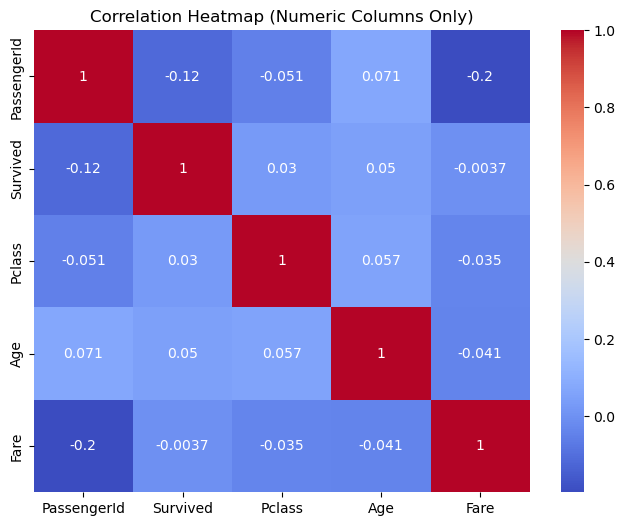

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

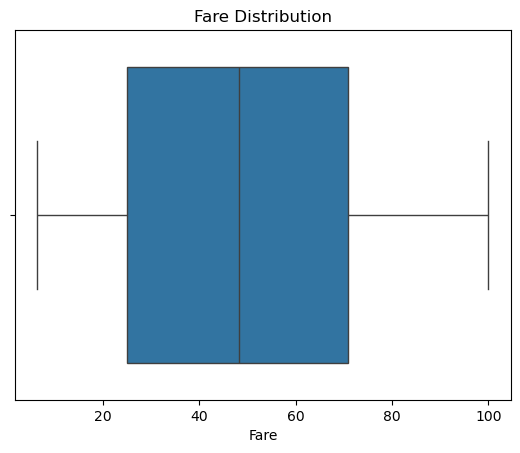

In [22]:
sns.boxplot(x='Fare', data=df)
plt.title("Fare Distribution")
plt.show()

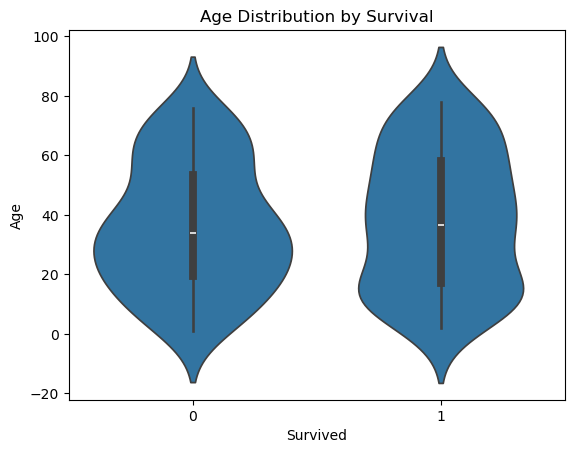

In [23]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

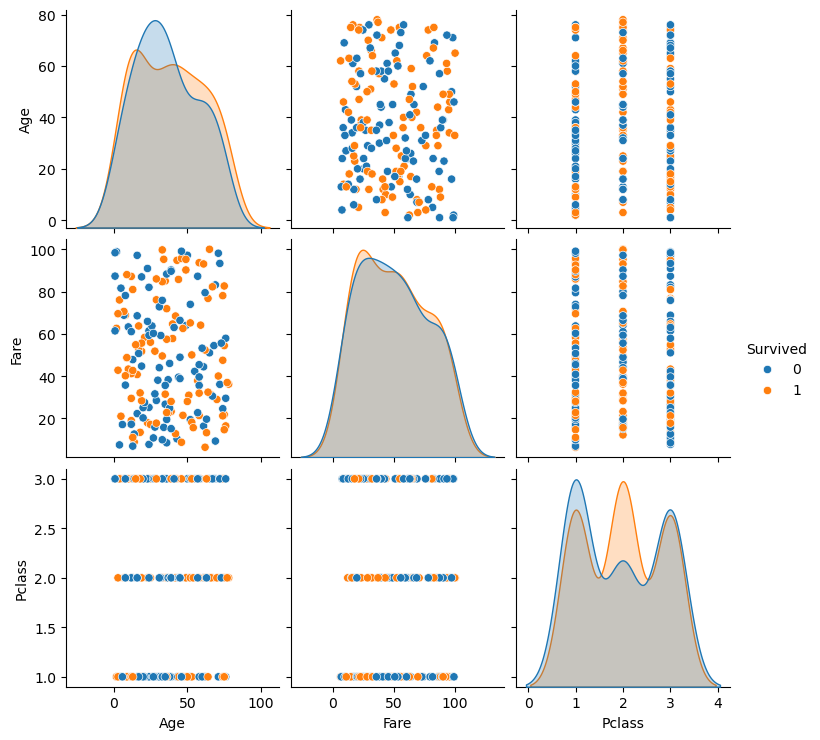

In [24]:
sns.pairplot(df[['Age','Fare','Pclass','Survived']], hue='Survived')

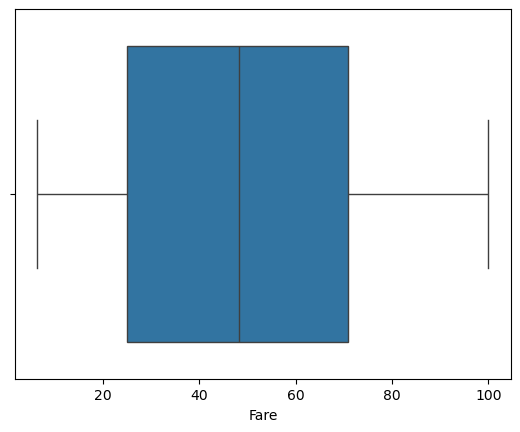

In [25]:
sns.boxplot(x='Fare', data=df)
plt.show()

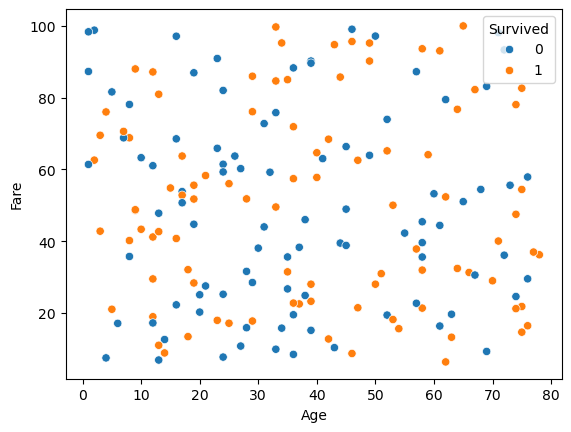

In [26]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.show()

In [27]:
df.groupby(['Pclass','Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.414634
        male      0.468750
2       female    0.655172
        male      0.562500
3       female    0.578947
        male      0.321429
Name: Survived, dtype: float64

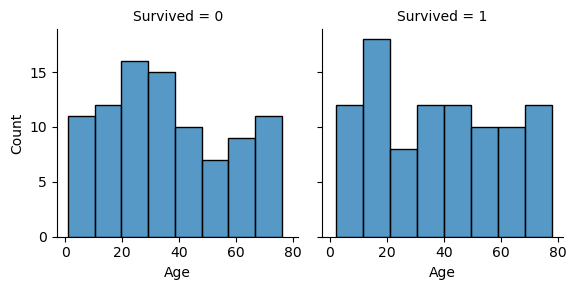

In [28]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Age')